In [1]:
# 문제 소개

In [2]:
## 과거 100년 기후자료를 이용해서 육상과 해양의 평균기온 예측

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# 다운로드 : https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data 
globalTemp = pd.read_csv("data/globaltemperatures.csv")

In [10]:
globalTemp.shape

(3192, 9)

In [12]:
globalTemp.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [13]:
globalTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [14]:
globalTemp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
globalTemp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [19]:
globalTemp.isnull().sum() / globalTemp.shape[0] * 100

dt                                            0.000000
LandAverageTemperature                        0.375940
LandAverageTemperatureUncertainty             0.375940
LandMaxTemperature                           37.593985
LandMaxTemperatureUncertainty                37.593985
LandMinTemperature                           37.593985
LandMinTemperatureUncertainty                37.593985
LandAndOceanAverageTemperature               37.593985
LandAndOceanAverageTemperatureUncertainty    37.593985
dtype: float64

In [37]:
def wrangle(df):
    df = df.copy()
    df = df.drop(columns=['LandAverageTemperatureUncertainty','LandMaxTemperatureUncertainty', 'LandMinTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty'], axis=1)
    df['dt']=pd.to_datetime(df['dt'])
    df['Month']=df['dt'].dt.month
    df['year']=df['dt'].dt.year
    df = df.drop('dt', axis=1)
    df = df[df.year >=1850]    
    df = df.set_index(['year'])
    df = df.dropna()    
    return df
    

In [ ]:
# 섭씨를 화씨로 변환하기
def convertTemp(x):
    x=(x*1.8) +32
    return float(x)

df['LandAverageTemperature']=df['LandAverageTemperature'].apply(convertTemp)
df['LandMaxTemperature']=df['LandMaxTemperature'].apply(convertTemp)
df['LandMinTemperature']=df['LandMinTemperature'].apply(convertTemp) 
df['LandAndOceanAverageTemperature']=df['LandAndOceanAverageTemperature'].apply(convertTemp)

In [38]:
globalTemp=wrangle(globalTemp)

In [39]:
globalTemp.head()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,Month
year,,,,,
1850,0.749,8.242,-3.206,12.833,1
1850,3.071,9.970,-2.291,13.588,2
1850,4.954,10.347,-1.905,14.043,3
1850,7.217,12.934,1.018,14.667,4
1850,10.004,15.655,3.811,15.507,5


In [40]:
globalTemp.shape

(1992, 5)

In [41]:
globalTemp.isnull().sum()

LandAverageTemperature            0
LandMaxTemperature                0
LandMinTemperature                0
LandAndOceanAverageTemperature    0
Month                             0
dtype: int64

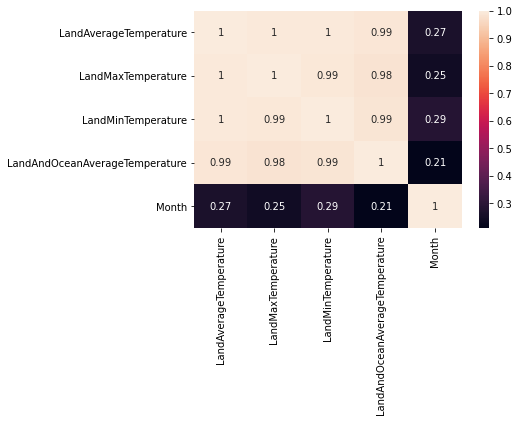

In [42]:
corrMatrix = globalTemp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [43]:
target = 'LandAndOceanAverageTemperature'
Y = globalTemp[target]
X = globalTemp[['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature']]

In [44]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1024, shuffle=None, stratify=None)

In [69]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1494, 3) (498, 3) (1494,) (498,)


In [58]:
from sklearn.metrics import mean_absolute_error

In [59]:
[Y_train.mean()] * len(Y_train)

[15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406961178,
 15.195268406

In [64]:
# Y_train 전체 평균를 Y_train개수만큼 생성
y_pred = [Y_train.mean()] * len(Y_train)

In [61]:
# Y_train평균과 Y_train 각각의 값의 차이
Y_train- y_pred

year
1991   -1.215268
1894    1.030732
1993    1.959732
2012    2.056732
1902    1.395732
          ...   
1901   -1.535268
1891   -2.158268
1900    0.177732
1926   -1.353268
2014   -0.785268
Name: LandAndOceanAverageTemperature, Length: 1494, dtype: float64

In [65]:
print('Baseline MAE:', round(mean_absolute_error(Y_train, y_pred), 5))

Baseline MAE: 1.12528


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [70]:
lm = make_pipeline(StandardScaler(), LinearRegression())
lm.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor

In [103]:
forestModel = make_pipeline(
    
    SelectKBest(k="all"),
    StandardScaler(),
    RandomForestRegressor(n_estimators=100, max_depth=50, random_state=77, n_jobs=-1)

)
forestModel.fit(X_train, Y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

In [76]:
lm_train_pred = lm.predict(X_train)
forest_train_pred = forestModel.predict(X_train)
lm_test_pred = lm.predict(X_test)
forest_test_pred = forestModel.predict(X_test)

In [77]:
print("학습데이터 선형회귀모델 평가: ", mean_absolute_error(Y_train, lm_train_pred))

학습데이터 모델 평가:  0.15600863760042377


In [79]:
print("검증데이터 선형회귀모델 평가: ", mean_absolute_error(Y_test, lm_test_pred))

검증데이터 선형회귀모델 평가:  0.15383622894723872


In [80]:
print("학습데이터 랜덤포레스트모델 평가: ", mean_absolute_error(Y_train, forest_train_pred))

학습데이터 랜덤포레스트모델 평가:  0.05061762382864839


In [81]:
print("검증데이터 랜덤포레스트모델 평가: ", mean_absolute_error(Y_test, forest_test_pred))

검증데이터 랜덤포레스트모델 평가:  0.13757993975903612


In [84]:
errors = abs(lm_test_pred - Y_test)
errors

year
1930    0.033454
1891    0.160627
1965    0.008653
1865    0.028339
1924    0.080561
          ...   
1990    0.295360
1912    0.144146
1957    0.198385
1874    0.083819
2009    0.294675
Name: LandAndOceanAverageTemperature, Length: 498, dtype: float64

In [89]:
Y_train

year
1991    13.980
1894    16.226
1993    17.155
2012    17.252
1902    16.591
         ...  
1901    13.660
1891    13.037
1900    15.373
1926    13.842
2014    14.410
Name: LandAndOceanAverageTemperature, Length: 1494, dtype: float64

In [85]:
mape = 100 * (errors / Y_train)

In [86]:
accuracy = 100 - np.mean(mape)

In [88]:
print("선형회귀 모델 예측 정확도:", round(accuracy, 2), '%')

선형회귀 모델 예측 정확도: 99.0 %


In [90]:
ferrors = abs(forest_test_pred - Y_test)
ferrors

year
1930    0.04141
1891    0.09565
1965    0.02699
1865    0.03986
1924    0.00799
         ...   
1990    0.48758
1912    0.08083
1957    0.17286
1874    0.04399
2009    0.31686
Name: LandAndOceanAverageTemperature, Length: 498, dtype: float64

In [91]:
fmape = 100 * (ferrors / Y_train)

In [92]:
faccuracy = 100 - np.mean(fmape)

In [93]:
print("랜덤포레스트 모델 예측 정확도:", round(faccuracy, 2), '%')

랜덤포레스트 모델 예측 정확도: 99.09 %


In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
params = {'selectkbest__k':range(5)}

In [117]:
rs = RandomizedSearchCV(forestModel, param_distributions=params, n_iter=5, n_jobs=-1, cv=10)

In [118]:
rs.fit(X_train, Y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('selectkbest',
                                              SelectKBest(k='all')),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(max_depth=50,
                                                                    n_jobs=-1,
                                                                    random_state=77))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'selectkbest__k': range(0, 5)})

In [119]:
best_model = rs.best_estimator_

In [120]:
best_model

Pipeline(steps=[('selectkbest', SelectKBest(k=3)),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

In [122]:
print("학습자료 절대평균오차:", mean_absolute_error(Y_train, best_model.predict(X_train)))
print("검증자료 절대평균오차:", mean_absolute_error(Y_test, best_model.predict(X_test)))

학습자료 절대평균오차: 0.05061762382864837
검증자료 절대평균오차: 0.13757993975903626


In [123]:
best_pred = best_model.predict(X_test)

In [124]:
errors = abs(best_pred - Y_test)
errors

year
1930    0.04141
1891    0.09565
1965    0.02699
1865    0.03986
1924    0.00799
         ...   
1990    0.48758
1912    0.08083
1957    0.17286
1874    0.04399
2009    0.31686
Name: LandAndOceanAverageTemperature, Length: 498, dtype: float64

In [126]:
mape = 100* (errors / Y_train)
mape

year
1850    0.645304
1850    0.666912
1850    0.584381
1850    0.681353
1850    0.611017
          ...   
2015    0.996418
2015    1.097983
2015    1.149095
2015    1.044831
2015    1.075875
Name: LandAndOceanAverageTemperature, Length: 4128, dtype: float64

In [127]:
(errors / Y_train)

year
1850    0.006453
1850    0.006669
1850    0.005844
1850    0.006814
1850    0.006110
          ...   
2015    0.009964
2015    0.010980
2015    0.011491
2015    0.010448
2015    0.010759
Name: LandAndOceanAverageTemperature, Length: 4128, dtype: float64

In [128]:
accuracy = 100 - np.mean(mape)

In [129]:
print("랜덤포레스트 최적모델 예측 정확도:", round(accuracy, 2), '%')

랜덤포레스트 최적모델 예측 정확도: 99.09 %


In [151]:
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': <AxesSubplot:xlabel='LandAverageTemperature'>})

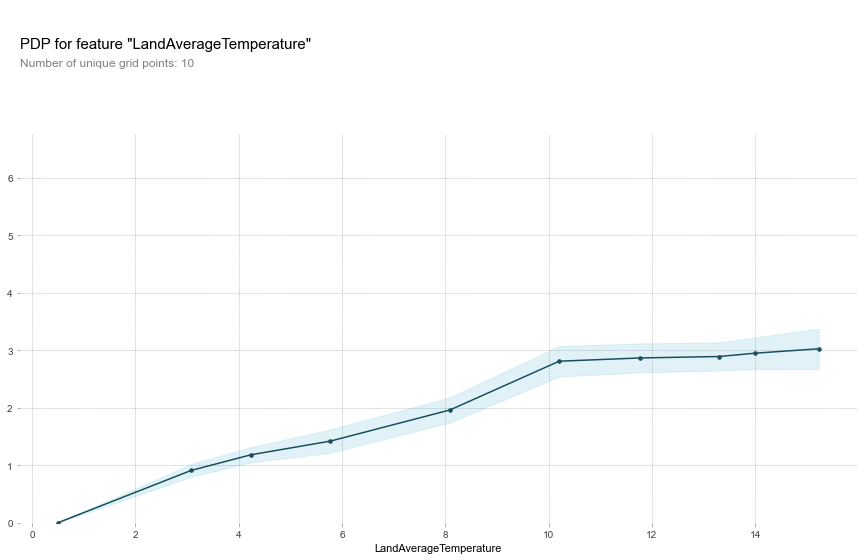

In [157]:
feature ='LandAverageTemperature'

isolated = pdp_isolate(
    model = forestModel,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature    
)

pdp_plot(isolated, feature_name=feature)